In [15]:
#Pelayo Leguina - 2024

#Este script permite convertir un archivo ROOT con clases tipo TClonesArray a un DataFrame de pandas.

# Para correr este script es necesario tener instalado ROOT y pandas
# Para tener root instalado, hay que generar el env con conda. 
# Mira el archivo environment.yml para ver cómo hacerlo. Una vez tengas el env creado, activa el env y ejecuta este notebook. 
# Puedes seguir trabajando aqui o exportar el dataframe a un archivo csv para trabajar en otro lado.

import ROOT
import pandas as pd

# Definir la ruta del archivo ROOT y el nombre del árbol
ruta_archivo_root = '../dtTuples/DTDPGNtuple_14_1_0_DYLL_M50_PU200_qcut0.root'
nombre_arbol = 'dtNtupleProducer/DTTREE'


In [16]:

# Abrir el archivo ROOT
archivo = ROOT.TFile.Open(ruta_archivo_root)
if not archivo or archivo.IsZombie():
    raise FileNotFoundError(f"No se pudo abrir el archivo ROOT en {ruta_archivo_root}")


In [17]:

# Obtener el árbol
arbol = archivo.Get(nombre_arbol)
if not arbol:
    raise ValueError(f"No se encontró el árbol '{nombre_arbol}' en el archivo ROOT.")

# Obtener el número de eventos en el árbol
numero_eventos = arbol.GetEntries()
print(f"El árbol tiene {numero_eventos} eventos.")


El árbol tiene 933000 eventos.


In [18]:

# Listas de ramas
ramas_event = ['event_eventNumber']
ramas_digis_numericas = ["digi_nDigis", "digi_wheel", "digi_sector", "digi_station", 
    "digi_superLayer", "digi_layer", "digi_wire", "digi_time"]
ramas_seg_numericas = [
    "seg_nSegments", "seg_wheel", "seg_sector", "seg_station", "seg_hasPhi", 
    "seg_hasZed", "seg_posLoc_x", "seg_posLoc_y", "seg_posLoc_z", 
    "seg_dirLoc_x", "seg_dirLoc_y", "seg_dirLoc_z", "seg_posLoc_x_SL1", 
    "seg_posLoc_x_SL3", "seg_posLoc_x_midPlane", "seg_posGlb_phi", 
    "seg_posGlb_eta", "seg_dirGlb_phi", "seg_dirGlb_eta", "seg_phi_t0", 
    "seg_phi_vDrift", "seg_phi_normChi2", "seg_phi_nHits", 
    "seg_z_normChi2", "seg_z_nHits"
]
ramas_seg_arrays = [
    'seg_phiHits_pos', 'seg_phiHits_posCh', 'seg_phiHits_posErr', 
    'seg_phiHits_side', 'seg_phiHits_wire', 'seg_phiHits_wirePos', 
    'seg_phiHits_layer', 'seg_phiHits_superLayer', 'seg_phiHits_time', 
    'seg_phiHits_timeCali'
]

ramas_a_extraer = ramas_event + ramas_digis_numericas + ramas_seg_numericas + ramas_seg_arrays


In [19]:

# Inicializar diccionario para almacenar los datos
data = {rama: [] for rama in ramas_a_extraer}

# Obtener el número de eventos en el árbol
numero_eventos = arbol.GetEntries()
print(f"El árbol tiene {numero_eventos} eventos.")


El árbol tiene 933000 eventos.


In [20]:
from collections import defaultdict
import time

data = defaultdict(list)

max_eventos = 5000

start_total = time.time()

# Iterar sobre las entradas del árbol
for i, evento in enumerate(arbol):
    start_event = time.time()
    if i >= max_eventos:
        break  # Detener el bucle cuando se alcanzan 100,000 eventos
    for rama in ramas_a_extraer:
        valor = getattr(evento, rama, None)
        
        if valor is None:
            data[rama].append(None)
            continue

        # Optimización: manejar TClonesArray
        if hasattr(valor, 'GetEntriesFast'):
            n_entries = valor.GetEntriesFast()  # Guardar número de entradas
            valores = [
                [x for x in valor.At(i)] if hasattr(valor.At(i), '__len__') else valor.At(i)
                for i in range(n_entries)
            ]
            data[rama].append(valores)
        elif isinstance(valor, (ROOT.TVectorF, ROOT.TVectorD)):
            # Optimización: convertir directamente a lista
            data[rama].append(list(valor))
        elif isinstance(valor, (int, float)):
            # Escalar simple
            data[rama].append(valor)
        else:
            try:
                # Intentar convertir a lista si es iterable
                data[rama].append(list(valor))
            except TypeError:
                data[rama].append(valor)
    end_event = time.time()
    print(f"Evento {i+1}: {end_event - start_event:.2f} segundos")

end_total = time.time()
print(f"Tiempo total: {end_total - start_total:.2f} segundos")
# Cerrar el archivo ROOT
archivo.Close()
#tarda como 1 minuto

Evento 1: 0.00 segundos
Evento 2: 0.00 segundos
Evento 3: 0.00 segundos
Evento 4: 0.00 segundos
Evento 5: 0.00 segundos
Evento 6: 0.00 segundos
Evento 7: 0.00 segundos
Evento 8: 0.00 segundos
Evento 9: 0.00 segundos
Evento 10: 0.00 segundos
Evento 11: 0.00 segundos
Evento 12: 0.00 segundos
Evento 13: 0.00 segundos
Evento 14: 0.00 segundos
Evento 15: 0.00 segundos
Evento 16: 0.00 segundos
Evento 17: 0.00 segundos
Evento 18: 0.00 segundos
Evento 19: 0.00 segundos
Evento 20: 0.00 segundos
Evento 21: 0.00 segundos
Evento 22: 0.00 segundos
Evento 23: 0.00 segundos
Evento 24: 0.00 segundos
Evento 25: 0.00 segundos
Evento 26: 0.00 segundos
Evento 27: 0.00 segundos
Evento 28: 0.00 segundos
Evento 29: 0.00 segundos
Evento 30: 0.00 segundos
Evento 31: 0.00 segundos
Evento 32: 0.00 segundos
Evento 33: 0.00 segundos
Evento 34: 0.01 segundos
Evento 35: 0.00 segundos
Evento 36: 0.00 segundos
Evento 37: 0.00 segundos
Evento 38: 0.00 segundos
Evento 39: 0.00 segundos
Evento 40: 0.01 segundos
Evento 41

In [21]:

# Verificar que todas las ramas tienen la misma longitud
longitudes = {rama: len(val) for rama, val in data.items()}
print("Longitud de cada rama:")

for rama, longitud in longitudes.items():
    print(f"{rama}: {longitud}")

# Convertir a DataFrame
try:
    df = pd.DataFrame(data)
except ValueError as e:
    print("Error al crear el DataFrame:", e)
    for rama, longitud in longitudes.items():
        print(f"{rama}: {longitud}")
    raise

# Mostrar una vista previa del DataFrame
print("\nVista previa del DataFrame:")
print(df.head())

# Contar los hits en las ramas tipo array
for rama in ramas_seg_arrays:
    if rama in df.columns:
        df[f'{rama}_count'] = df[rama].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Mostrar conteos
for rama in ramas_seg_arrays:
    if f'{rama}_count' in df.columns:
        print(f"\nNúmero de hits por evento en '{rama}':")
        print(df[f'{rama}_count'].head())

# Guardar el DataFrame en un archivo CSV
df.to_csv('data.csv', index=False)
print('Data saved in data.csv')

#Ahora ya puedes trabajar con el df para generar las entradas/verdades de tu modelo de ML
#Siempre asegurate de preprocesar el df, rellenar los NaNs, normalizar los datos, etc.

#Recuerda que deberíamos filtrar los digis pertenecientes a la SL2 (no trabajamos en esa dimension)
#Lo mismo para los segmentos que no tienen hits en phi (son segmentos de la SL2 y tambien tenemos que cargarnoslos)
# Suerte! :)

Longitud de cada rama:
event_eventNumber: 5000
digi_nDigis: 5000
digi_wheel: 5000
digi_sector: 5000
digi_station: 5000
digi_superLayer: 5000
digi_layer: 5000
digi_wire: 5000
digi_time: 5000
seg_nSegments: 5000
seg_wheel: 5000
seg_sector: 5000
seg_station: 5000
seg_hasPhi: 5000
seg_hasZed: 5000
seg_posLoc_x: 5000
seg_posLoc_y: 5000
seg_posLoc_z: 5000
seg_dirLoc_x: 5000
seg_dirLoc_y: 5000
seg_dirLoc_z: 5000
seg_posLoc_x_SL1: 5000
seg_posLoc_x_SL3: 5000
seg_posLoc_x_midPlane: 5000
seg_posGlb_phi: 5000
seg_posGlb_eta: 5000
seg_dirGlb_phi: 5000
seg_dirGlb_eta: 5000
seg_phi_t0: 5000
seg_phi_vDrift: 5000
seg_phi_normChi2: 5000
seg_phi_nHits: 5000
seg_z_normChi2: 5000
seg_z_nHits: 5000
seg_phiHits_pos: 5000
seg_phiHits_posCh: 5000
seg_phiHits_posErr: 5000
seg_phiHits_side: 5000
seg_phiHits_wire: 5000
seg_phiHits_wirePos: 5000
seg_phiHits_layer: 5000
seg_phiHits_superLayer: 5000
seg_phiHits_time: 5000
seg_phiHits_timeCali: 5000

Vista previa del DataFrame:
   event_eventNumber  digi_nDigis  \
0

In [22]:
from newGeo.dtGeometry import *
from itertools import chain
import logging

geometry_xml_path = "newGeo/DTGeometry.xml"


# Parse DT Geometry XML
print("\nParsing DT Geometry XML...")
df_geometry = parse_dtgeometry_xml(geometry_xml_path)

def create_wire_position_mapping(df_geometry):
    mapping = {}
    for idx, row in df_geometry.iterrows():
        chamber_rawId = row['Chamber_rawId']
        superLayerNumber = row['SuperLayerNumber']
        layerNumber = row['LayerNumber']
        channels_total = row['Channels_total']
        wireFirst = row['WirePositions_FirstWire']
        wireLast = row['WirePositions_LastWire']
        # Create Wire object to get positions
        wire_obj = Wire(wireFirst, wireLast, channels_total, row['Layer_Local_z'])
        # Map wire numbers to positions
        for wire_idx, x_pos in enumerate(wire_obj.positions):
            wire_number = wire_idx + 1  # Assuming wire numbers start from 1
            key = (chamber_rawId, superLayerNumber, layerNumber, wire_number)
            mapping[key] = x_pos
    return mapping

def explode_dataframe(df, list_columns):
    """Explota columnas con listas en filas separadas."""
    # Repetir índices según la longitud de las listas
    lengths = df[list_columns[0]].apply(len)
    idx = df.index.repeat(lengths)

    # Explotar las columnas de listas
    exploded_data = {col: list(chain.from_iterable(df[col])) for col in list_columns}

    # Agregar las columnas que no son listas
    exploded_df = pd.DataFrame(exploded_data, index=idx)
    non_list_columns = df.columns.difference(list_columns)
    for col in non_list_columns:
        exploded_df[col] = df[col].repeat(lengths)

    return exploded_df.reset_index(drop=True)

def add_chamber_rawId_to_digis(df):
    """Agrega la columna chamber_rawId basada en wheel, station y sector."""
    chamber_rawIds = []
    for idx, row in df.iterrows():
        try:
            rawId = get_rawId(row['digi_wheel'], row['digi_station'], row['digi_sector'])
        except ValueError as e:
            logging.error(f"Error al calcular rawId en el índice {idx}: {e}")
            rawId = None
        chamber_rawIds.append(rawId)
    df['digi_chamber_rawId'] = chamber_rawIds
    return df

def map_digi_wires_to_positions(df, wire_position_mapping):
    """Mapea los wires a sus posiciones en x usando wire_position_mapping."""
    x_positions = []
    for idx, row in df.iterrows():
        key = (row['digi_chamber_rawId'], row['digi_superLayer'], row['digi_layer'], row['digi_wire'])
        x_pos = wire_position_mapping.get(key, None)  # Por defecto, None si no se encuentra la clave
        x_positions.append(x_pos)
    df['digi_x_pos'] = x_positions
    return df

def reconstruct_dataframe(df_original, df_flattened, list_columns, extra_columns):
    """
    Reconstruye el DataFrame original, agrupando las columnas calculadas en listas.

    Args:
    - df_original: DataFrame original con listas.
    - df_flattened: DataFrame aplanado después de las explosiones y cálculos.
    - list_columns: Columnas que originalmente estaban en formato de lista.
    - extra_columns: Nuevas columnas a agregar al DataFrame.

    Returns:
    - DataFrame reconstruido con las columnas adicionales.
    """
    # Crear índice auxiliar para asociar filas a las originales
    df_flattened["original_index"] = df_original.index.repeat(
        df_original[list_columns[0]].apply(len)
    )

    # Agrupar filas aplanadas según el índice original
    grouped = df_flattened.groupby("original_index")

    # Agregar de vuelta las columnas originales y las nuevas
    for col in list_columns + extra_columns:
        df_original[col] = grouped[col].apply(list).reindex(df_original.index).tolist()

    return df_original

wire_position_mapping = create_wire_position_mapping(df_geometry)

# Columnas con valores en listas
list_columns = ['digi_wheel', 'digi_sector', 'digi_station', 'digi_superLayer', 'digi_layer', 'digi_wire']

# Explotar el DataFrame para trabajar con cada digi individualmente
df_flattened = explode_dataframe(df, list_columns)

# Agregar la columna chamber_rawId
df_flattened = add_chamber_rawId_to_digis(df_flattened)

# Calcular las posiciones de los wires
df_flattened = map_digi_wires_to_positions(df_flattened, wire_position_mapping)

# Reconstruir el DataFrame original con la nueva columna
df = reconstruct_dataframe(df, df_flattened, list_columns, ['digi_x_pos'])

# Reordenar columnas para que digi_x_pos aparezca después de digi_wire
columns = df.columns.tolist()
digi_wire_index = columns.index('digi_wire')
columns.insert(digi_wire_index + 1, columns.pop(columns.index('digi_x_pos')))
df = df[columns]

# Mostrar el DataFrame final 
#print(df.head())
#tarda como 3 min


Parsing DT Geometry XML...


In [23]:
# Ramas relacionadas con 'digis'
ramas_digis = [
    "event_eventNumber",
    "digi_nDigis", "digi_wheel", "digi_sector", "digi_station", 
    "digi_superLayer", "digi_layer", "digi_wire", "digi_time"
]

# Ramas relacionadas con 'segments' (seg)
ramas_segments = [
    "event_eventNumber",
    "seg_nSegments",
    "seg_wheel",
    "seg_sector",
    "seg_station",
    "seg_hasPhi",
    "seg_hasZed",
    "seg_posLoc_x",
    "seg_posLoc_y",
    "seg_posLoc_z",
    "seg_dirLoc_x",
    "seg_dirLoc_y",
    "seg_dirLoc_z",
    "seg_posLoc_x_SL1",
    "seg_posLoc_x_SL3",
    "seg_posLoc_x_midPlane",
    "seg_posGlb_phi",
    "seg_posGlb_eta",
    "seg_dirGlb_phi",
    "seg_dirGlb_eta",
    "seg_phi_t0",
    "seg_phi_vDrift",
    "seg_phi_normChi2",
    "seg_phi_nHits",
    "seg_z_normChi2",
    "seg_z_nHits",
    "seg_phiHits_wire",
    "seg_phiHits_layer",
    "seg_phiHits_superLayer"
]

# Combinar todas las ramas a extraer
ramas_a_extraer = ramas_digis + ramas_segments

In [24]:
# Extraer las ramas relacionadas con 'digis' en un DataFrame de pandas
df_digis = df[ramas_digis]

# Extraer las ramas relacionadas con 'segments' en otro DataFrame de pandas
df_segments = df[ramas_segments]

In [25]:
# Función para convertir Awkward Arrays a listas de Python
def convertir_a_lista(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return list(x)
    return [x]  # En caso de que sea un valor escalar, lo convertimos en lista

# Aplicar la conversión a todas las columnas de 'digis' que son listas ( excepto 'event_eventNumber' )  

for col in ramas_digis:
    df_digis.loc[:, col] = df_digis[col].apply(convertir_a_lista)

for col in ramas_segments:
    df_segments.loc[:, col] = df_segments[col].apply(convertir_a_lista)

/tmp/ipykernel_2931/1175030818.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[list([27005]) list([27004]) list([27001]) ... list([193998])
 list([194000]) list([193992])]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_digis.loc[:, col] = df_digis[col].apply(convertir_a_lista)
/tmp/ipykernel_2931/1175030818.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[list([23]) list([131]) list([82]) ... list([13]) list([40]) list([56])]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_digis.loc[:, col] = df_digis[col].apply(convertir_a_lista)
/tmp/ipykernel_2931/1175030818.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[list([27005]) list([27004]) list([27001]) ... list([193998])

### Primero manupulo los digis

In [26]:
# Definir las columnas relacionadas con 'digis' que serán aplanadas
columns_to_explode_digis = ['digi_superLayer', 'digi_layer', 'digi_wire', 'digi_time', 'digi_wheel', 'digi_sector', 'digi_station']

# Función para verificar si todas las listas tienen la misma longitud en una fila
def verificar_longitudes(row, cols):
    lengths = [len(row[col]) for col in cols]
    return len(set(lengths)) == 1  # True si todas las longitudes son iguales

# Aplicar la función a cada fila
# Asignar la columna 'same_length' usando .loc
df_digis.loc[:, 'same_length'] = df_digis.apply(lambda row: verificar_longitudes(row, columns_to_explode_digis), axis=1)

# Verificar cuántas filas cumplen la condición
print("Número de filas con listas de la misma longitud en 'digis':")
print(df_digis['same_length'].value_counts())

# Filtrar solo las filas que cumplen la condición
df_digis = df_digis[df_digis['same_length']]

# Eliminar la columna auxiliar
df_digis = df_digis.drop(columns=['same_length'])


Número de filas con listas de la misma longitud en 'digis':
same_length
True    5000
Name: count, dtype: int64


/tmp/ipykernel_2931/2511920445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_digis.loc[:, 'same_length'] = df_digis.apply(lambda row: verificar_longitudes(row, columns_to_explode_digis), axis=1)


In [27]:
# ahora vamos a aplanar las columnas de 'digis' que contienen listas
columns_to_explode_digis = [
    'digi_superLayer', 'digi_layer', 'digi_wire', 
    'digi_time', 'digi_wheel', 'digi_sector', 'digi_station'
]

df_digis_exploded = df_digis.explode(columns_to_explode_digis)

# Renombrar las columnas a nombres más cortos
df_digis_exploded = df_digis_exploded.rename(columns={
    "event_eventNumber": "eventNumber",
    "digi_superLayer": "superLayer",
    "digi_layer": "layer",
    "digi_wire": "wire",
    "digi_time": "time",
    "digi_wheel": "wheel",
    "digi_sector": "sector",
    "digi_station": "station"
})

# Convertir 'event_eventNumber' a entero, ya que antes era una lista
df_digis_exploded['eventNumber'] = df_digis_exploded['eventNumber'].apply(lambda x: x if isinstance(x, (int, str)) else x[0])

# Eliminar la columna 'digi_nDigis' ya que no es necesaria, puesto que cuenta el numero de digis en cada evento, no de cada estación
df_digis_exploded = df_digis_exploded.drop(columns=['digi_nDigis'])
# ELiminamos los digis de la superLayer 2, ya que no son necesarios y pueden influir en los resultados
df_digis_exploded = df_digis_exploded[df_digis_exploded['superLayer'] != 2]
#print("Preview of 'df_digis_exploded':")
#display(df_digis_exploded.head())

In [28]:
# Ahora vamos a agrupar los digis por evento y estación
df_digis_grouped = df_digis_exploded.groupby(
    ['eventNumber', 'wheel', 'sector', 'station']
).agg({
    'superLayer': list,
    'layer': list,
    'wire': list,
    'time': list
}).reset_index()

df_digis_grouped['n_digis'] = df_digis_grouped['wire'].apply(len)

# Mostrar una vista previa después de aplanar
tamaño_bytes = df_digis_grouped.memory_usage(deep=True).sum()
print(f"Tamaño del DataFrame en bytes: {tamaño_bytes}")
#df_digis_grouped.head()


Tamaño del DataFrame en bytes: 22173508


### Para hacer los grafos

In [29]:
# Eliminar las columnas 'time' no nos hacen falta para los nodos
df_digis_exploded_graph = df_digis_exploded.drop(columns=['time'])

#agrupar digis para hacer los grafos
df_digis_nodos = df_digis_exploded_graph.groupby(
    ['eventNumber', 'wheel', 'sector', 'station','superLayer']
).agg({
    'wire': list,
    'layer': list
}).reset_index()

Para verlo hecho con networkx mirar grafos .ipynb

In [30]:
#Con torch
import torch
from torch_geometric.data import Data
import itertools

# Función para construir el grafo
def construir_grafo_pyg(row):
    wires = row['wire']  
    layers = row['layer']  

    # Crear nodos como pares (wire, layer)
    nodos = [(wires[i], layers[i]) for i in range(len(wires))]

    # Crear mapa de nodos a indices
    nodo_indices = {nodo: idx for idx, nodo in enumerate(nodos)}

    # Generar aristas
    edge_index = []
    for i, j in itertools.combinations(range(len(nodos)), 2):
        wire_i, layer_i = nodos[i]
        wire_j, layer_j = nodos[j]

        if abs(layer_i - layer_j) == 1 and abs(wire_i - wire_j) <= 1:
            edge_index.append((nodo_indices[nodos[i]], nodo_indices[nodos[j]]))

    # Convertir a tensores de PyTorch
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    x = torch.tensor([[wire, layer] for wire, layer in nodos], dtype=torch.float)

    return Data(x=x, edge_index=edge_index)

# Ejemplo con la primera fila del dataframe
ejemplo_grafo = construir_grafo_pyg(df_digis_nodos.iloc[12])
print(ejemplo_grafo)

# Imprimir aristas en forma de pares de nodos
edge_index = ejemplo_grafo.edge_index
aristas = edge_index.t().tolist()  # Convertir a lista de pares
print("Aristas:", aristas)


Data(x=[4, 2], edge_index=[2, 3])
Aristas: [[0, 1], [1, 2], [2, 3]]


### Ahora manipulo los segments

In [31]:
# Se construyen ahora la verdades con la parte de segments
# En concreto nos interesan las columnas seg_phiHits_wire y seg_phiHits_superlayer
# Creamos los grafos de la misma manera, primero aplanamos los datos

# Eliminar columnas de segmentos con las que no vamos a trabajar (todas menos 'event_eventNumber', 'seg_wheel', 'seg_sector', 'seg_station')
#Esto es porque de momento queremos solo predecir si hay o no segmentos en una estación, no cuantos ni su posición.

columnas_a_eliminar = [col for col in df_segments.columns if col not in ['event_eventNumber', 'seg_wheel', 'seg_sector', 'seg_station',"seg_phiHits_wire","seg_phiHits_layer","seg_phiHits_superLayer"]]

df_segments_filtered = df_segments.drop(columns=columnas_a_eliminar)

# Nos aseguramos de que 'event_eventNumber' sea un escalar, ya que antes convertimos todas las columnas a listas
df_segments_filtered['event_eventNumber'] = df_segments['event_eventNumber'].str[0]

# ahora vamos a aplanar las columnas de 'digis' que contienen listas
columns_to_explode_segments = [
    "seg_phiHits_superLayer", "seg_phiHits_layer", "seg_phiHits_wire", 
    'seg_wheel', 'seg_sector', 'seg_station'
]


df_segments_exploded = df_segments_filtered.explode(columns_to_explode_segments)

# Renombrar las columnas a nombres más cortos
df_segments_exploded = df_segments_exploded.rename(columns={
    "event_eventNumber": "eventNumber",
    "seg_phiHits_superLayer": "superLayer",
    "seg_phiHits_layer": "layer",
    "seg_phiHits_wire": "wire",
    'seg_wheel': "wheel",
    'seg_sector': "sector",
    'seg_station': "station"
})

# Nos aseguramos de que 'event_eventNumber' sea un escalar, ya que antes convertimos todas las columnas a listas
df_segments_exploded['event_eventNumber'] = df_segments['event_eventNumber'].str[0]

df_segments_exploded.head()

,eventNumber,wheel,sector,station,wire,layer,superLayer,event_eventNumber
0,27005,2,1,1,"[27.0, 28.0, 26.0, 25.0, 26.0]","[3.0, 4.0, 2.0, 3.0, 4.0]","[1.0, 1.0, 3.0, 3.0, 3.0]",27005
0,27005,2,8,1,"[30.0, 31.0, 30.0, 30.0]","[1.0, 2.0, 3.0, 4.0]","[1.0, 1.0, 1.0, 1.0]",27005
1,27004,2,2,1,"[2.0, 1.0, 2.0]","[2.0, 3.0, 4.0]","[1.0, 1.0, 1.0]",27004
1,27004,-2,3,1,"[4.0, 5.0, 5.0, 5.0, 6.0]","[3.0, 1.0, 2.0, 3.0, 4.0]","[1.0, 3.0, 3.0, 3.0, 3.0]",27004
1,27004,-2,3,1,"[4.0, 5.0, 5.0, 5.0, 6.0]","[3.0, 1.0, 2.0, 3.0, 4.0]","[1.0, 3.0, 3.0, 3.0, 3.0]",27004


In [32]:
# hay que eliminar las filas que tienen listas vacias en wire, layer y superlayer puesto que estas pertenecen a la superlayer 2
# Identificar y eliminar filas donde col2 (u otra columna) tiene listas vacías
columnas_a_revisar = ["wire", 'layer', 'superLayer']  # Lista de columnas que queremos revisar
df_segments_exploded_limpio = df_segments_exploded[~df_segments_exploded[columnas_a_revisar]
    .apply(lambda col: col.apply(lambda x: isinstance(x, list) and len(x) == 0))
    .any(axis=1)
] 

# Función para convertir los números de una lista a enteros
def convertir_a_enteros(lista):
    return [int(x) if isinstance(x, (float, int)) else x for x in lista]

# Eliminar filas con cualquier valor faltante (NaN)
df_segments_exploded_limpio = df_segments_exploded_limpio.dropna()

# Aplicar la conversión solo a las columnas que contienen listas
df_segments_exploded_limpio.loc[:, "wire"] = df_segments_exploded_limpio["wire"].apply(convertir_a_enteros)
df_segments_exploded_limpio.loc[:, "layer"] = df_segments_exploded_limpio["layer"].apply(convertir_a_enteros)
df_segments_exploded_limpio.loc[:, "superLayer"] = df_segments_exploded_limpio["superLayer"].apply(convertir_a_enteros)

#volvemos a explotar
df_segments_exploded_2 = df_segments_exploded_limpio.explode(columnas_a_revisar)

# Ahora vamos a agrupar los digis por evento y estación
df_segments_nodos = df_segments_exploded_2.groupby(
    ['eventNumber', 'wheel', 'sector', 'station', 'superLayer']
).agg({
    'layer': list,
    'wire': list,
}).reset_index()

df_segments_nodos.head()

,eventNumber,wheel,sector,station,superLayer,layer,wire
0,27001,0,2,1,1,"[1, 3, 4]","[29, 30, 30]"
1,27001,0,2,1,3,"[1, 3, 4]","[31, 32, 32]"
2,27001,0,2,2,1,"[1, 3, 4]","[26, 27, 27]"
3,27001,0,2,2,3,"[1, 2, 3, 4]","[27, 27, 27, 27]"
4,27001,0,2,3,1,"[1, 3]","[46, 47]"


In [33]:
# Creamos los grafos con torch, usando la funcion creada antes
# Ejemplo con la primera fila del dataframe
ejemplo_grafo = construir_grafo_pyg(df_segments_nodos.iloc[0])

print(ejemplo_grafo)

# Imprimir aristas en forma de pares de nodos
edge_index = ejemplo_grafo.edge_index
aristas = edge_index.t().tolist()  # Convertir a lista de pares
print("Aristas:", aristas)


Data(x=[3, 2], edge_index=[2, 1])
Aristas: [[1, 2]]


### Creo nuevos grafos a los que le incluyo la verdad

In [34]:
from itertools import zip_longest
#Lo mismo pero optimizado
df1 = df_digis_nodos
df2 = df_segments_nodos

# Columnas a usar para la comparación de correspondencia (excluyendo 'wire' y 'layer')
comparison_columns = ["eventNumber", "wheel", "sector", "station", "superLayer"]

# Unir los DataFrames usando las columnas relevantes
merged_df = pd.merge(df1, df2, on=comparison_columns, suffixes=('_df1', '_df2'))

# Función para comparar listas con manejo de longitudes distintas
def compare_lists(list1, list2):
    return [x == y if x is not None and y is not None else False for x, y in zip_longest(list1, list2)]

# Aplicar la comparación de listas a las columnas 'wire' y 'layer'
merged_df['wire_comparison'] = merged_df.apply(lambda row: compare_lists(row['wire_df1'], row['wire_df2']), axis=1)
merged_df['layer_comparison'] = merged_df.apply(lambda row: compare_lists(row['layer_df1'], row['layer_df2']), axis=1)

# Seleccionar solo las columnas de interés
df_verdad = merged_df[['wire_comparison', 'layer_comparison']]

df_digis_nodos = merged_df[['eventNumber', 'wheel', 'sector', 'station', 'superLayer', 'wire_df1', 'layer_df1']]

df_segments_nodos = merged_df[['eventNumber', 'wheel', 'sector', 'station', 'superLayer', 'wire_df2', 'layer_df2']]
# Mostrar el resultado
#print(df_verdad)


In [35]:
def etiquetar_aristas_con_dataframe_verdad(row, row_verdad):
    # Datos del grafo general
    wires = row['wire_df1']
    layers = row['layer_df1']
    nodos = [(wires[i], layers[i]) for i in range(len(wires))]
    nodo_indices = {nodo: idx for idx, nodo in enumerate(nodos)}

    # Datos del grafo de verdad
    wires_verdad = row_verdad['wire_df2']
    layers_verdad = row_verdad['layer_df2']
    nodos_verdad = [(wires_verdad[i], layers_verdad[i]) for i in range(len(wires_verdad))]
    nodo_indices_verdad = {nodo: idx for idx, nodo in enumerate(nodos_verdad)}

    # Generar aristas para el grafo general
    edge_index = []
    for i, j in itertools.combinations(range(len(nodos)), 2):
        wire_i, layer_i = nodos[i]
        wire_j, layer_j = nodos[j]
        if abs(layer_i - layer_j) == 1 and abs(wire_i - wire_j) <= 1:
            edge_index.append((nodo_indices[nodos[i]], nodo_indices[nodos[j]]))

    # Generar aristas para el grafo de verdad
    edge_index_verdad = []
    for i, j in itertools.combinations(range(len(nodos_verdad)), 2):
        wire_i, layer_i = nodos_verdad[i]
        wire_j, layer_j = nodos_verdad[j]
        if abs(layer_i - layer_j) == 1 and abs(wire_i - wire_j) <= 1:
            edge_index_verdad.append((nodo_indices_verdad[nodos_verdad[i]], nodo_indices_verdad[nodos_verdad[j]]))

    # Convertir las aristas del grafo de verdad a un set
    aristas_verdad = set((u, v) for u, v in edge_index_verdad)

    # Generar etiquetas de las aristas
    edge_labels = []
    for arista in edge_index:
        if arista in aristas_verdad or (arista[1], arista[0]) in aristas_verdad:
            edge_labels.append(1)  # La arista está en el grafo de verdad
        else:
            edge_labels.append(0)  # La arista no está en el grafo de verdad

    # Convertir datos a tensores de PyTorch
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    x = torch.tensor([[wire, layer] for wire, layer in nodos], dtype=torch.float)
    edge_labels = torch.tensor(edge_labels, dtype=torch.long)

    # Retornar el grafo con las etiquetas de las aristas
    return Data(x=x, edge_index=edge_index, edge_attr=edge_labels)



# Construir el grafo con las etiquetas de la verdad
grafo_verdad = etiquetar_aristas_con_dataframe_verdad(df_digis_nodos.iloc[14], df_segments_nodos.iloc[14])

# Imprimir el grafo resultante
print(grafo_verdad)

# Imprimir las aristas del grafo
edge_index = grafo_verdad.edge_index
aristas = edge_index.t().tolist()  # Convertir a lista de pares
print("Aristas:", aristas)
print('Valores:',df_digis_nodos.iloc[14], df_segments_nodos.iloc[14])
# Imprimir las etiquetas de la verdad
print("Verdad etiquetas:", grafo_verdad.y)
print('Verdad aristas', grafo_verdad.edge_attr)


Data(x=[3, 2], edge_index=[2, 2], edge_attr=[2])
Aristas: [[0, 1], [1, 2]]
Valores: eventNumber           27002
wheel                     1
sector                    7
station                   2
superLayer                1
wire_df1       [12, 13, 12]
layer_df1         [1, 2, 3]
Name: 14, dtype: object eventNumber           27002
wheel                     1
sector                    7
station                   2
superLayer                1
wire_df2       [12, 13, 12]
layer_df2         [1, 2, 3]
Name: 14, dtype: object
Verdad etiquetas: None
Verdad aristas tensor([1, 1])


1. x=[8, 2]
Esto representa las características de los nodos del grafo.
x es un tensor de dimensiones [8, 2]:

    - 8: Número de nodos en el grafo.
    - 2: Número de características asociadas a cada nodo.

2. edge_index=[2, 7]
    Esto representa las aristas del grafo en forma de pares de índices de nodos.

    edge_index es un tensor de dimensiones [2, 7]:

        - 2: Cada columna de este tensor representa un par de nodos conectados (un "origen" y un "destino").
        - 7: Número total de aristas en el grafo.

    Por ejemplo:
    
        edge_index = 
                    [[0, 1, 2, 3, 4, 5, 6],  # Nodo origen de cada arista
                    [1, 2, 3, 4, 5, 6, 7]]  # Nodo destino de cada arista
              
    Esto significa que:
        - Hay una arista desde el nodo 0 al nodo 1.
        - Hay una arista desde el nodo 1 al nodo 2.

3. y=[8]
    Esto representa las etiquetas o targets del grafo.
    y es un tensor de dimensiones [8]:

    8: Número de nodos (igual al número de filas en x), indicando que cada nodo tiene una etiqueta asociada.

    Por ejemplo:
        y = [1, 0, 1, 0, 0, 1, 1, 0]



In [36]:
#CREAR DATASET

from torch_geometric.data import Data, Dataset, DataLoader

# Ahora, crearemos un dataset con múltiples grafos.
class MuonTrajectoryDataset(Dataset):
    def __init__(self, df_digis_nodos, df_verdad, transform=None):
        self.df_digis_nodos = df_digis_nodos
        self.df_verdad = df_verdad
        self.transform = transform  # Atributo transform, por si se desea aplicar alguna transformación

    def len(self):
        # Aquí devolvemos el tamaño del dataset, que es el número de filas en df_digis_nodos
        return len(self.df_digis_nodos)

    def get(self, idx):
        # Obtener la fila correspondiente al índice
        row = self.df_digis_nodos.iloc[idx]
        row_verdad = self.df_verdad.iloc[idx]
        # Construir el grafo con la fila actual y las etiquetas de la verdad
        data = etiquetar_aristas_con_dataframe_verdad(row, row_verdad)

        # Si se define una transformación, aplicarla a los datos
        if self.transform:
            data = self.transform(data)

        return data
    
    def indices(self):
        # Implementar indices() para devolver el rango de índices
        return range(len(self.df_digis_nodos))

# Crear el dataset
dataset = MuonTrajectoryDataset(df_digis_nodos, df_segments_nodos)

# Verificar el tamaño del dataset
print(f"Tamaño del dataset: {len(dataset)}")

# Crear un DataLoader para manejar los lotes
data_loader = DataLoader(dataset, batch_size=2, shuffle=True)

# Filtrar grafos sin aristas
# Filtrar grafos sin aristas
valid_dataset = [data for data in dataset if data.edge_index.numel() > 0]

print(f"Grafos válidos: {len(valid_dataset)} de {len(dataset)}")


Tamaño del dataset: 35480


/home/blanca_belmonte/miniconda3/envs/jupyter_ml_env/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Grafos válidos: 34919 de 35480


### Graph Neural Network

In [37]:
import torch
from torch_geometric.nn import GCNConv, Sequential
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch_geometric.data import DataLoader

# Modelo GCN usando Sequential para simplificar
class GCN_Model(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN_Model, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index, edge_attr):
        # Forward pass de las convoluciones GCN
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        # Aplicamos una capa fully connected (FC) sobre la salida de la última convolución
        x = self.fc(x)
        return x

# Configuración del modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Usar GPU si está disponible
input_dim = 2  # Los nodos tienen 2 características (wire, layer)
hidden_dim = 16  # Número de características en la capa oculta
output_dim = 2  # El número de clases de salida (puede ajustarse según el problema)

# Crear el modelo GCN
model = GCN_Model(input_dim, hidden_dim, output_dim).to(device)

# Optimización y configuración
optimizer = Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Optimizador Adam
loss_fn = CrossEntropyLoss()  # Función de pérdida


In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_data, test_data = train_test_split(valid_dataset, test_size=0.2, random_state=42)

# Crear DataLoader para los conjuntos de entrenamiento y prueba
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False)

/home/blanca_belmonte/miniconda3/envs/jupyter_ml_env/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [39]:
def evaluate_model(model, test_loader, loss_fn):
    model.eval()  # Poner el modelo en modo de evaluación
    total_loss = 0
    correct = 0
    total = 0

    
    with torch.no_grad():  # No calcular gradientes durante la evaluación
        for data in test_loader:
            data = data.to(device)  # Enviar datos a GPU si está disponible
            
            # Realizamos el forward pass
            out = model(data.x, data.edge_index, data.edge_attr)  # forward pass

            # Aseguramos que las predicciones sólo se calculen para las aristas
            pred = out.argmax(dim=1)  # Predicción de las clases de las aristas
            
            # Seleccionamos las predicciones correspondientes a las aristas en `data.edge_index`
            edge_predictions = pred[data.edge_index[0]]  # Filtramos las predicciones para las aristas

            # Comparar las predicciones con las etiquetas de las aristas
            correct += (edge_predictions == data.edge_attr).sum().item()  # Contar aciertos
            total += data.edge_attr.size(0)  # Número total de aristas en esta instancia

            # Calcular la pérdida
            loss = loss_fn(out[data.edge_index[0]], data.edge_attr)  # Pérdida solo para las aristas
            total_loss += loss.item()
        


    # Calcular la pérdida promedio y la precisión
    avg_loss = total_loss / len(test_loader)
    accuracy = correct / total
    print(f"Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    return avg_loss, accuracy


In [40]:
# Función de entrenamiento
def train_model(model, train_loader, test_loader, optimizer, loss_fn, epochs=5):
    model.train()  # Poner el modelo en modo de entrenamiento
    losses = [] # para graficar la pérdida
    accuracies = [] # para graficar la precision del modelo
    for epoch in range(epochs):
        total_loss = 0
        for data in train_loader:
            data = data.to(device)  # Enviar datos a GPU si está disponible
            optimizer.zero_grad()  # Limpiar gradientes
            
            # Realizamos el forward pass
            out = model(data.x, data.edge_index, data.edge_attr)  # data.x son las características de los nodos, 
                                                                # data.edge_index son las aristas, y data.edge_attr las etiquetas de las aristas
            
            # Calculamos la pérdida basada en las etiquetas de las aristas
            loss = loss_fn(out[data.edge_index[0]], data.edge_attr)  # Nos aseguramos de que solo consideramos las aristas
            total_loss += loss.item()

            loss.backward()  # Retropropagación
            optimizer.step()  # Actualizar parámetros
        
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")
        
        
        # Evaluación en el conjunto de prueba
        avg_loss, accuracy = evaluate_model(model, test_loader, loss_fn)
        losses.append(avg_loss)
        accuracies.append(accuracy)
    return losses, accuracies  



In [41]:
# Llamar a la función de entrenamiento
losses, accuracies = train_model(model, train_loader, test_loader, optimizer, loss_fn, epochs=3)

Epoch 1/3, Loss: 0.6514
Test Loss: 0.6553, Accuracy: 0.6051
Epoch 2/3, Loss: 0.6501
Test Loss: 0.6500, Accuracy: 0.6051
Epoch 3/3, Loss: 0.6496
Test Loss: 0.6515, Accuracy: 0.6051


### Evaluacion del modelo

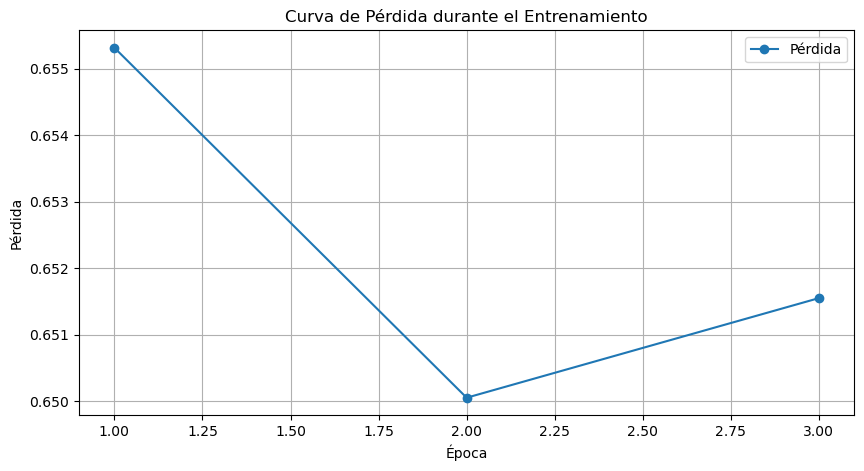

In [42]:
#Perdida
plt.figure(figsize=(10, 5))        
plt.plot(range(1, len(losses) + 1), losses, marker='o', label='Pérdida')
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Curva de Pérdida durante el Entrenamiento")
plt.grid()
plt.legend()
plt.show()

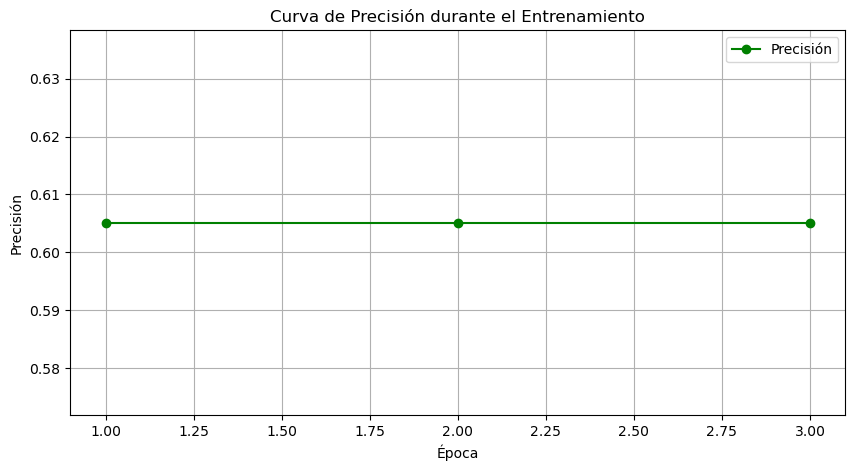

In [43]:
# Curva de Precisión
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', color='green', label='Precisión')
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.title("Curva de Precisión durante el Entrenamiento")
plt.grid()
plt.legend()
plt.show()

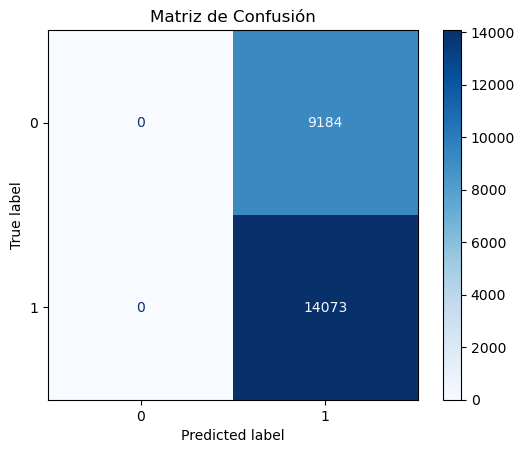

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def matriz_confusion(data_loader, model, all_labels):
    y_true = []
    y_pred = []
    model.eval()  # Poner el modelo en modo de evaluación

    for data in data_loader:
        data = data.to(device)  # Enviar datos a GPU si está disponible
        out = model(data.x, data.edge_index, data.edge_attr)  # Forward pass

        # Predicción de las clases de las aristas
        pred = out.argmax(dim=1)  # Predicción de la clase con mayor puntuación

        # Comparar las predicciones con las etiquetas reales
        edge_predictions = pred[data.edge_index[0]]  # Filtramos las predicciones para las aristas

        y_true.extend(data.edge_attr.cpu().numpy())  # Convertir etiquetas reales a NumPy
        y_pred.extend(edge_predictions.cpu().numpy())  # Convertir predicciones a NumPy

    # Asegurarse de incluir todas las etiquetas posibles en la matriz de confusión
    cm = confusion_matrix(y_true, y_pred, labels=all_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
    
    # Visualizar la matriz de confusión
    disp.plot(cmap="Blues")
    plt.title("Matriz de Confusión")
    plt.show()

# Suponiendo que tus clases son 0 y 1 para las aristas
all_labels = [0, 1]
matriz_confusion(test_loader, model, all_labels)


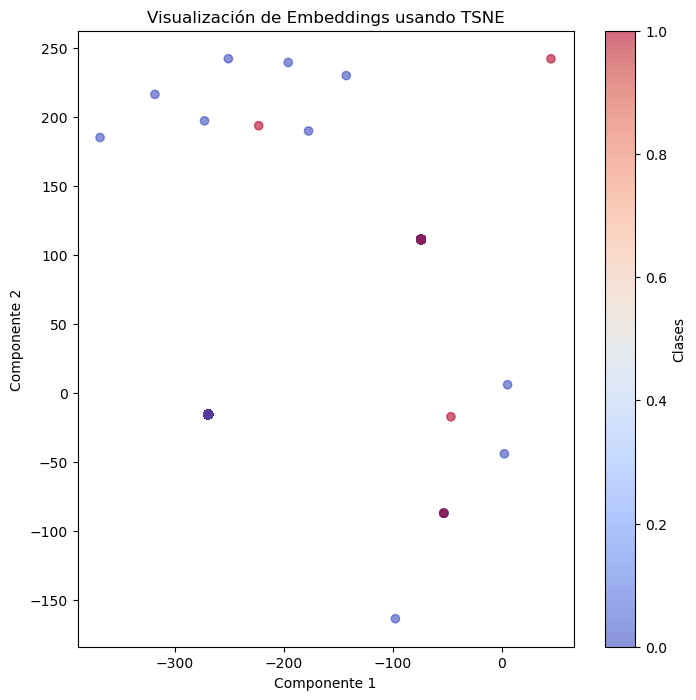

In [48]:
def visualizar_embeddings(model, data_loader, metodo="tsne", num_samples=5000):
    model.eval()
    embeddings = []
    labels = []

    with torch.no_grad():
        for i, data in enumerate(data_loader):
            data = data.to(device)
            
            # Pasa los datos por el modelo y extrae los embeddings
            hidden = model.conv2(F.relu(model.conv1(data.x, data.edge_index)), data.edge_index)
            
            # Asegurarse de que los datos tienen el mismo tamaño
            if hidden.size(0) == data.edge_attr.size(0):  # Coincidencia de nodos/aristas
                embeddings.append(hidden.cpu())
                labels.append(data.edge_attr.cpu())

            # Limitar el número de muestras para la visualización
            if len(embeddings) > num_samples:
                break

    # Concatenar los embeddings y etiquetas
    embeddings = torch.cat(embeddings, dim=0).numpy()
    labels = torch.cat(labels, dim=0).cpu().numpy().flatten()

    # Asegurar que las dimensiones coincidan
    assert embeddings.shape[0] == labels.shape[0], (
        f"Los embeddings ({embeddings.shape[0]}) y las etiquetas ({labels.shape[0]}) no coinciden"
    )

    # Reducir dimensionalidad
    if metodo == "tsne":
        reducer = TSNE(n_components=2, random_state=42, perplexity=30)
    elif metodo == "pca":
        reducer = PCA(n_components=2)
    else:
        raise ValueError("Método debe ser 'tsne' o 'pca'")
    
    reduced_embeddings = reducer.fit_transform(embeddings)

    # Visualización
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(
        reduced_embeddings[:, 0],
        reduced_embeddings[:, 1],
        c=labels[:reduced_embeddings.shape[0]],  # Asegurar que las etiquetas coinciden
        cmap="coolwarm",
        alpha=0.6,
    )
    plt.colorbar(scatter, label="Clases")
    plt.title(f"Visualización de Embeddings usando {metodo.upper()}")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()

# Llama a la función
visualizar_embeddings(model, test_loader, metodo="tsne")
